Jupyter Notebook to generate EDA plots and figures

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# data processing
df = pd.read_csv('../data/jvds_stelkin_cat_v012_mge_sami_hsc.csv')

# if SR_JVDS20 1 then SR_FR 1 if FR_JVDS20 1 then SR_FR 0 else -1
df["SR_FR"] = df.apply(lambda x: 1 if x["SR_JVDS20"] == 1 else 0 if x["FR_JVDS20"] == 1 else -1, axis=1)
df = df[df["SR_FR"] != -1]
df["CATID"] = df["CATID"].astype(str)

# all parameters considered
variables = ['SR_FR','LMSTAR', 'SIGMA_RE', 'RE', "ELLIP", "H4_RE", "LW_AGE_RE","LAMBDAR_RE", "MTYPE"]
df = df[variables]
df = df.dropna()

# morphologies
label_mapping = {
    0: '0: E',
    0.5: '0.5: E/S0',
    1: '1: S0; Lenticular',
    1.5: '1.5: S0/Early-spiral',
    2: '2: Early-spirals',
    2.5: '2.5: Early/Late-spirals',
    3: '3: Late-spirals',
    -9: '-9: No agreement',
}

In [4]:
def plot_scatter_with_lines(df, variable, variable_math, font=15):
    plt.figure(figsize=(10, 10))

    # Scatter plot for "FR" and "SR" categories
    plt.scatter(df[df["SR_FR"] == 0][variable],
                df[df["SR_FR"] == 0]["LAMBDAR_RE"],
                label="FR",
                s=50,
                )
    plt.scatter(df[df["SR_FR"] == 1][variable],
                df[df["SR_FR"] == 1]["LAMBDAR_RE"],
                label="SR",
                s=50,
                )

    if variable == "ELLIP":
        # Dotted line lamdar_re = 0.1
        plt.axhline(y=0.1, color='black', linestyle='--', label="Emsellem et al. 2007")

        # y = 0.3 x sqrt(x) line
        x = np.linspace(0, 0.8, 100)
        y = 0.3 * np.sqrt(x)
        plt.plot(x, y, color='black', linestyle=':', label="Emsellem et al. 2011")

        # y = 0.08 + x/4
        x = np.linspace(0, 0.4, 100)
        y = 0.08 + x / 4
        plt.plot(x, y, color='black', linestyle='-.', label="Cappellari 2016")
        # Vertical line from x-axis to x[-1], y[-1]
        plt.plot([x[-1], x[-1]], [0, y[-1]], color='black', linestyle='-.')

        # y = 0.16 + x/4
        x = np.linspace(0, 0.35 + 0.16 / 1538, 100)
        y = 0.16 + x / 4
        plt.plot(x, y, color='black', linestyle='-', label="van de Sande et al., 2021")
        # Vertical line from x-axis to x[-1], y[-1]
        plt.plot([x[-1], x[-1]], [0, y[-1]], color='black', linestyle='-')

    plt.xlabel(variable_math, fontsize=font)
    plt.ylabel("Spin Parameter proxy ($\lambda_{Re}$)", fontsize=font)
    plt.legend(bbox_to_anchor=(0.5, -0.075), loc='upper center', ncol=3, fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)

    plt.show()

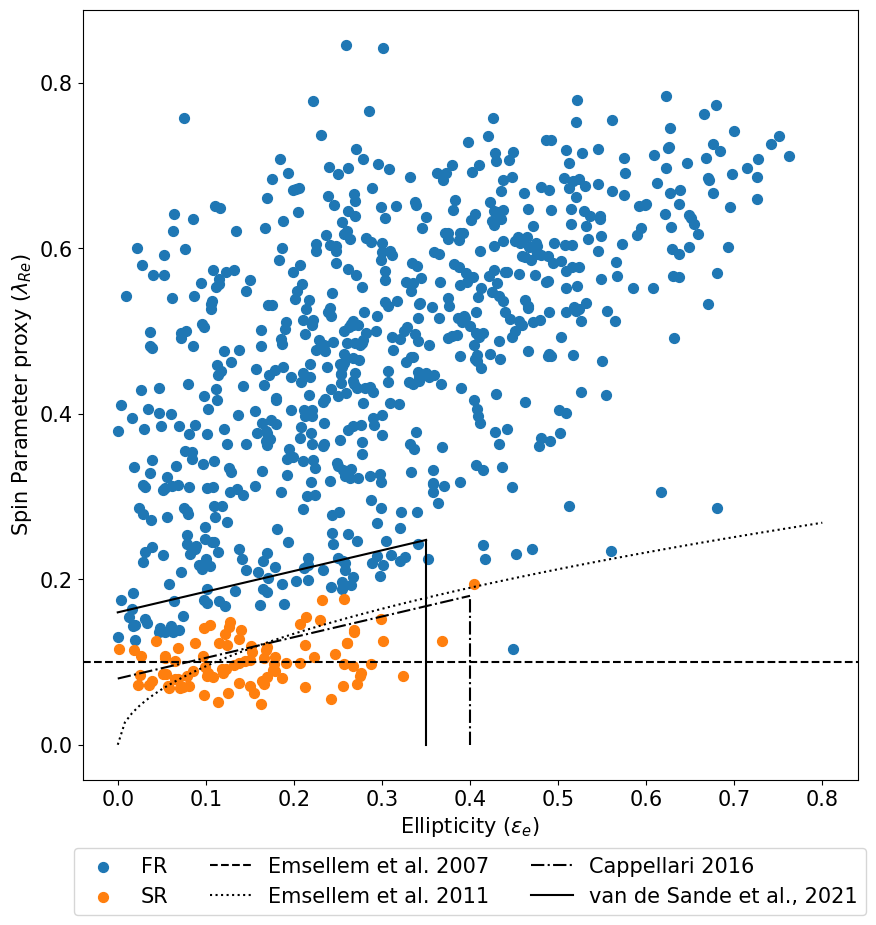

In [5]:
# LAMBDAR_RE vs. ELLIP
plot_scatter_with_lines(df, "ELLIP", r"Ellipticity ($\varepsilon_{e}$)")

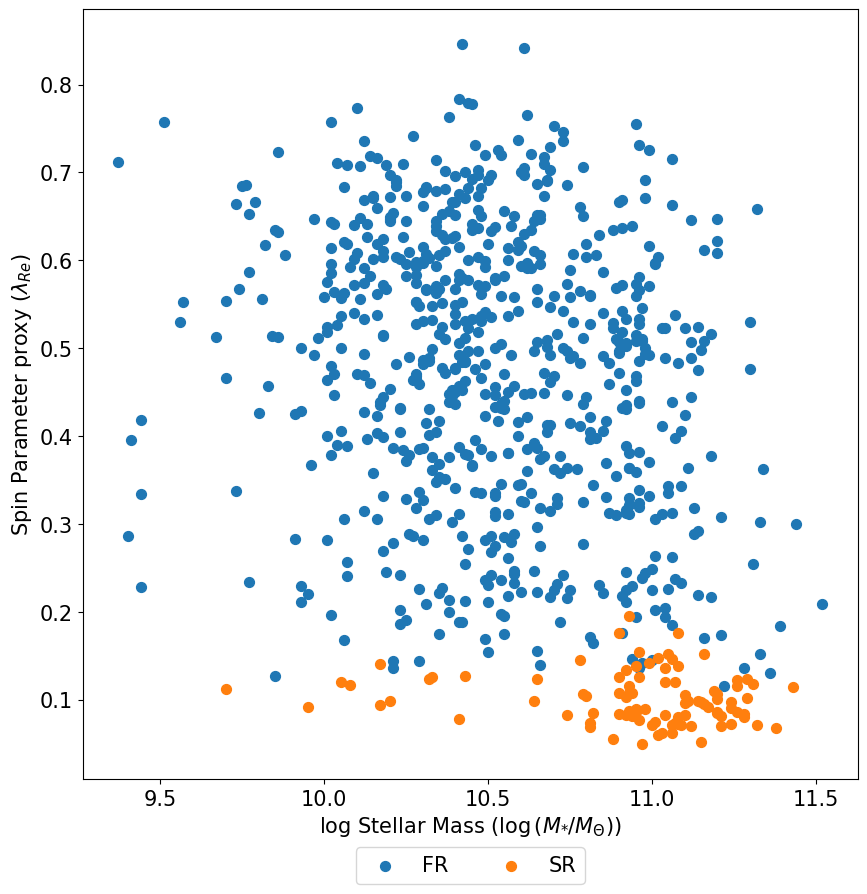

In [6]:
# LAMBDAR_RE vs. LMSTAR
plot_scatter_with_lines(df, "LMSTAR", r'log Stellar Mass ($\log{(M_{*} / M_{\Theta}))}$')

In [7]:
def plot_scatter_by_mtype(df, variable, variable_math, font):
    plt.figure(figsize=(10, 10))

    unique_mtypes = df["MTYPE"].unique()
    unique_mtypes = sorted(unique_mtypes)

    for i in range(len(unique_mtypes)):
        plt.scatter(df[df["MTYPE"] == unique_mtypes[i]][variable],
                    df[df["MTYPE"] == unique_mtypes[i]]["LAMBDAR_RE"],
                    label=label_mapping[unique_mtypes[i]],
                    s=50
                    )

    g = 15
    plt.xlabel(variable_math, fontsize=font)
    plt.ylabel("Spin Parameter proxy ($\lambda_{Re}$)", fontsize=font)
    plt.legend(bbox_to_anchor=(0.5, -0.075), loc='upper center', ncol=3, fontsize=font)
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)

    plt.show()

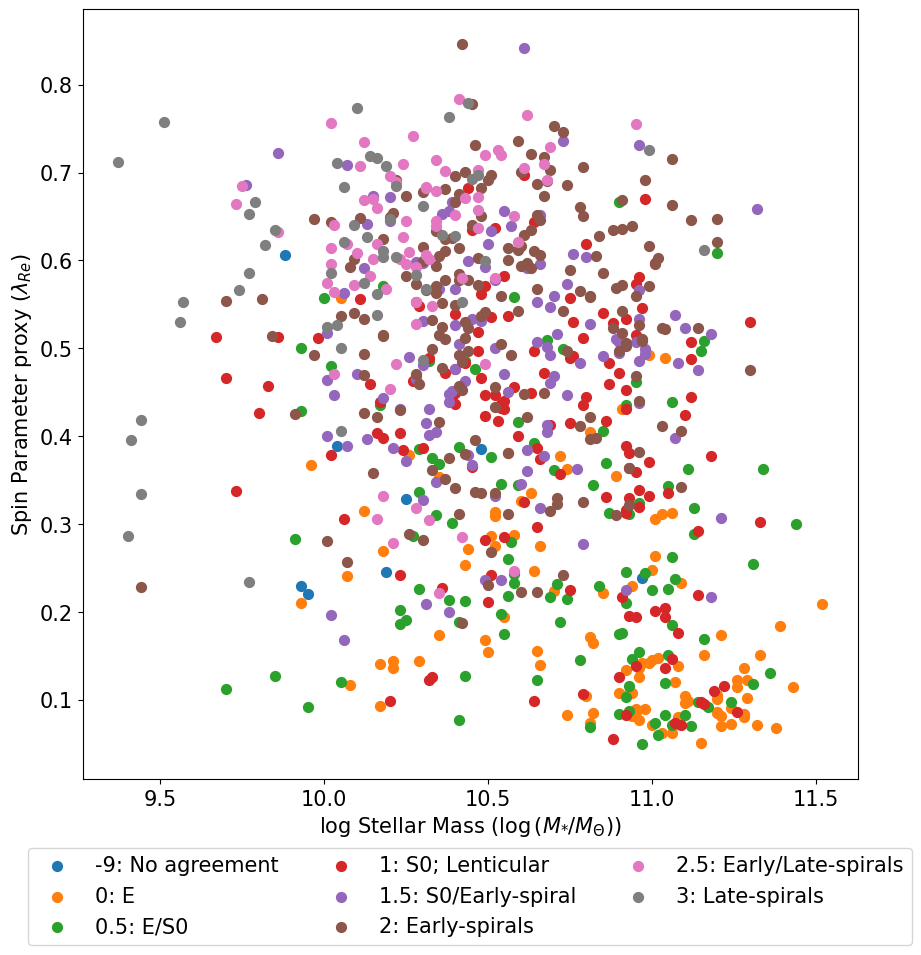

In [8]:
# LAMBDAR_RE vs. LMSTAR by MTYPE
plot_scatter_by_mtype(df, "LMSTAR", r'log Stellar Mass ($\log{(M_{*} / M_{\Theta}))}$', font=15)

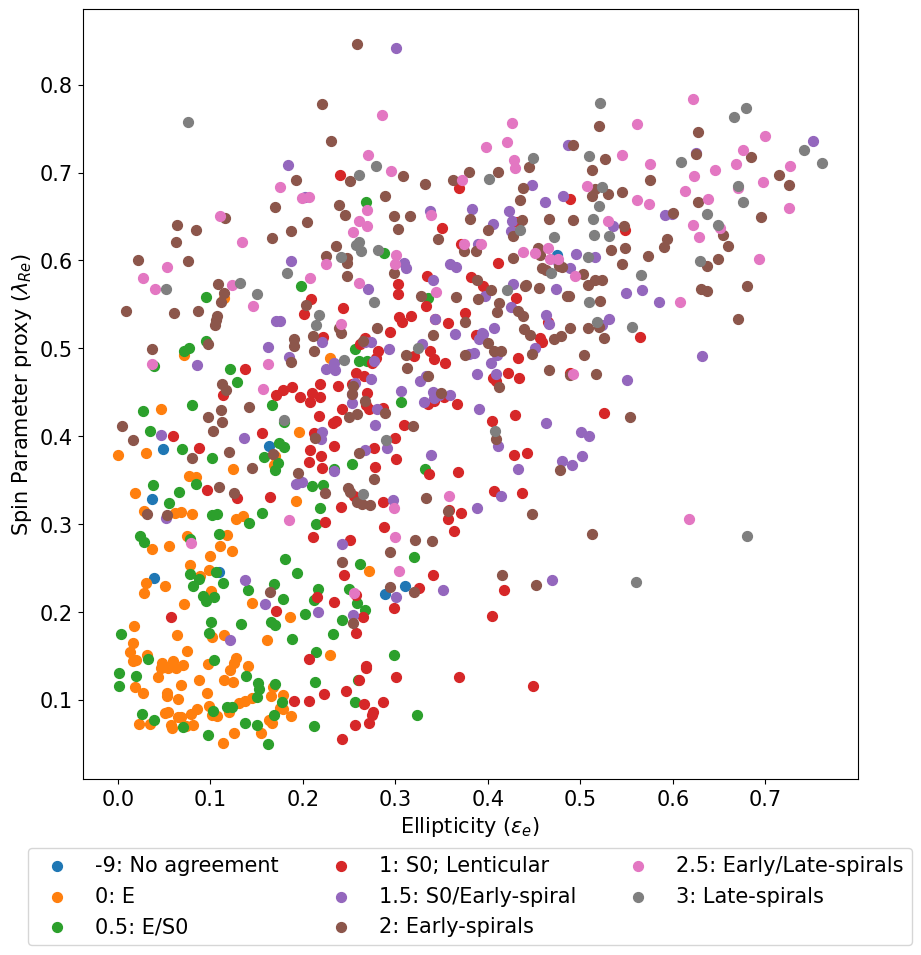

In [9]:
# LAMBDAR_RE vs. ELLIP by MTYPE
plot_scatter_by_mtype(df, "ELLIP", r"Ellipticity ($\varepsilon_{e}$)", font=15)

c:\Users\Siharath\Anaconda3\envs\lightning\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Siharath\AppData\Local\Temp\ipykernel_8488\45159520.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=1)


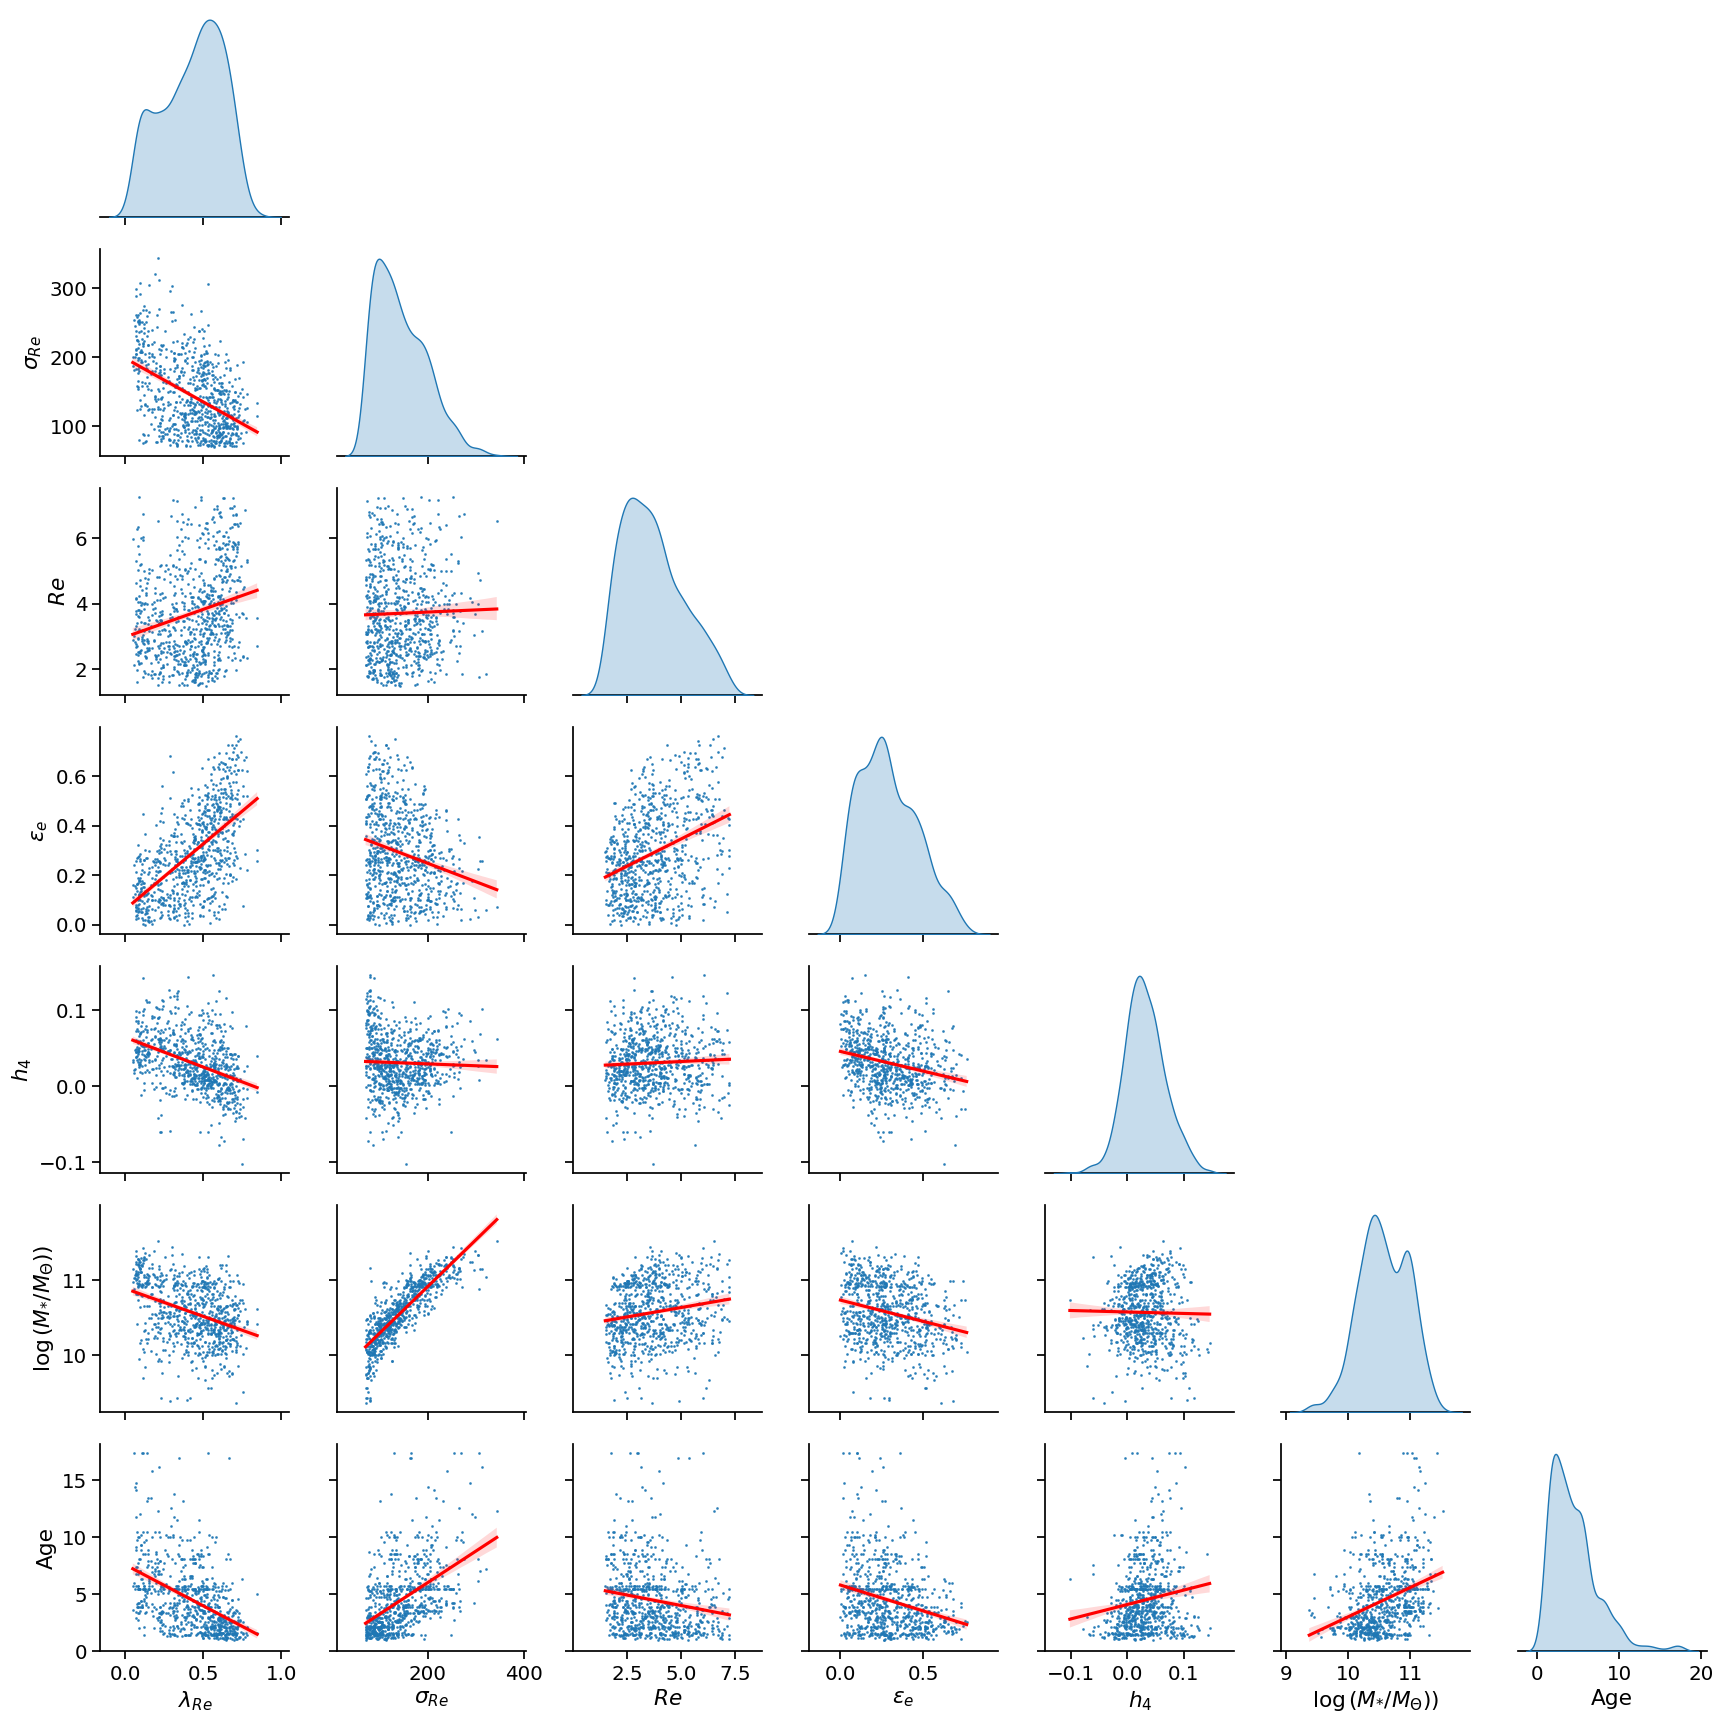

In [10]:
# plotting the pairplot

import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot and set the dot size
tmp = variables[1:]
tmp = tmp[:-1]
df_tmp = df[tmp]

df_tmp = pd.DataFrame({"$\lambda_{Re}$": df_tmp["LAMBDAR_RE"], "$\sigma_{Re}$": df_tmp["SIGMA_RE"], "$Re$": df_tmp["RE"], r"$\varepsilon_e$": df_tmp["ELLIP"], "$h_{4}$": df_tmp["H4_RE"], "$\log{(M_{*} / M_{\Theta}))}$": df_tmp["LMSTAR"], "Age": df_tmp["LW_AGE_RE"]})

sns.set_context("notebook", font_scale=1.3) 
g = sns.pairplot(df_tmp, vars=df_tmp.columns, corner=True, diag_kind='kde', kind="reg", plot_kws=dict(scatter_kws=dict(s=1), line_kws=dict(color='red')))


plt.subplots_adjust(top=0.95)  # Adjust the top margin
plt.tight_layout(w_pad=1)

plt.show()


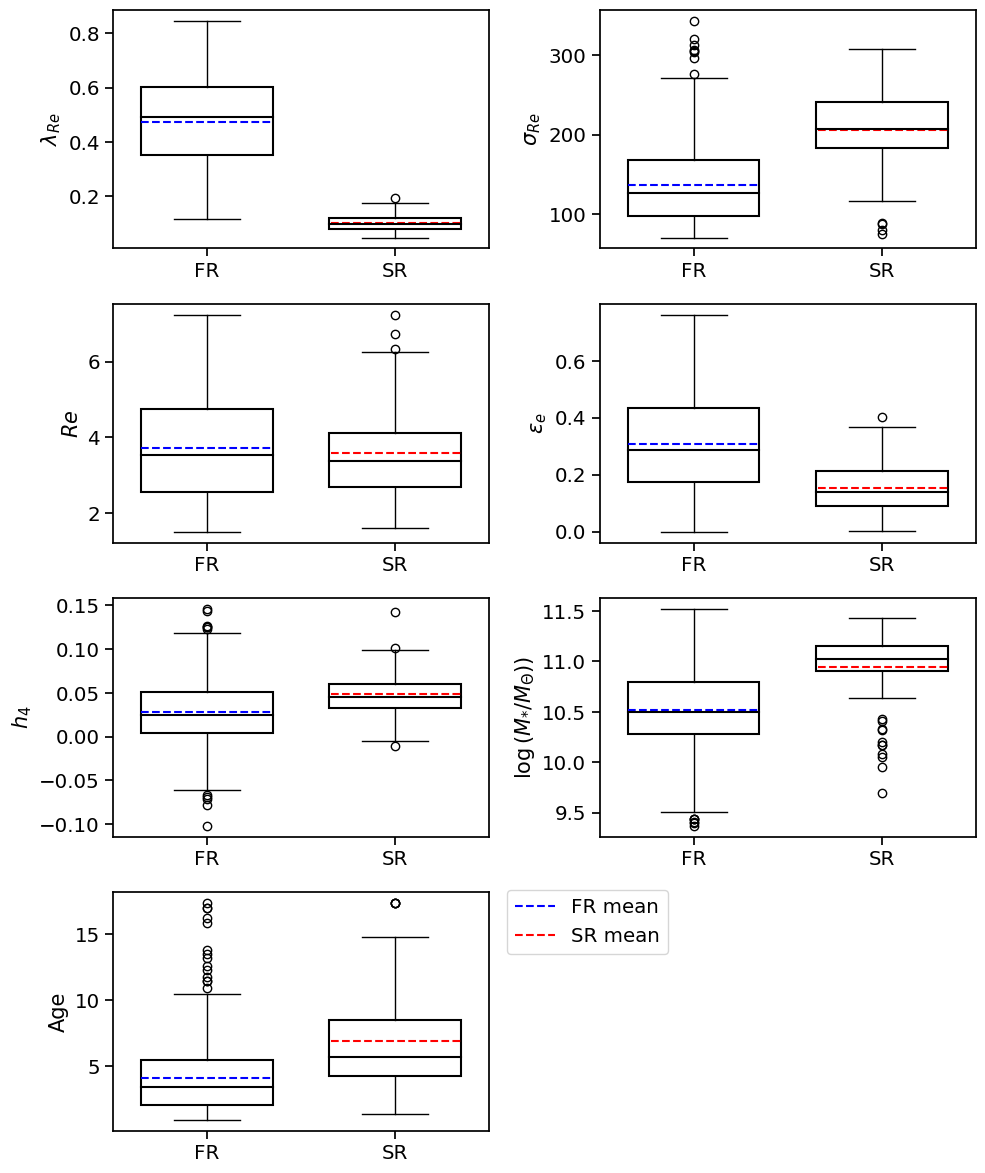

In [11]:
# get boxplot of each parameter

import matplotlib.pyplot as plt

# Create a 4x2 subplot arrangement
fig, axs = plt.subplots(4, 2, figsize=(10, 12))
df_variables = df_tmp
tvariables = df_variables.columns.values

# Flatten the axs array to access individual subplots
axs = axs.flatten()

for i in range(7):
    # Horizontal boxplot
    data = [df_variables[df["SR_FR"] == 0][tvariables[i]],
            df_variables[df["SR_FR"] == 1][tvariables[i]]
           ]
    bplot = axs[i].boxplot(data, patch_artist=True, widths=0.7)  # Enable patch_artist mode

    axs[i].set_xticks([1, 2])
    axs[i].set_xticklabels(["FR", "SR"])
    axs[i].set_ylabel(tvariables[i], fontsize=15)

    # Customize the box and mean line properties
    for element in ['boxes', 'medians']:
        plt.setp(bplot[element], color='black', linewidth=1.5)

    for patch in bplot['boxes']:
        patch.set(facecolor='white')  # Set the box color to white

    axs[i].axhline(data[0].mean(), 0.075, 0.075+0.35, linestyle='--', linewidth=1.5, color='blue', label="FR mean")
    axs[i].axhline(data[1].mean(), 0.58, 0.58+0.35, linestyle='--', linewidth=1.5, color='red', label="SR mean")

# Hide the remaining subplots if there are more than 8 variables
for i in range(7, 7 + len(tvariables) - 7):
    fig.delaxes(axs[i])

fig.delaxes(axs[7])

# Adjust the spacing between subplots
plt.tight_layout()

# legend to right
plt.legend(bbox_to_anchor=(1.5, 1.05), loc='upper right')

# Show the plots
plt.show()

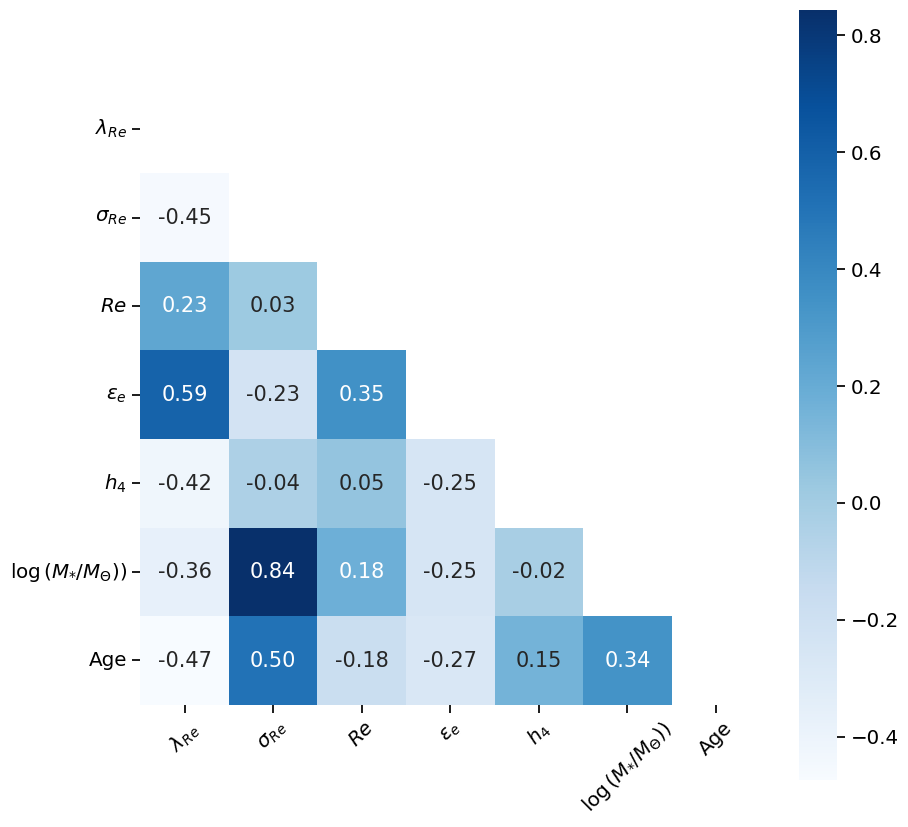

In [12]:
import matplotlib.pyplot as plt
# correlation matrix
import seaborn as sns
corr = df_variables.corr()
# only show the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# plot
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues, fmt='.2f', mask=mask, square=True,annot_kws={"size": 15})
# rotate x-axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Text(1, 150, '12.0%')

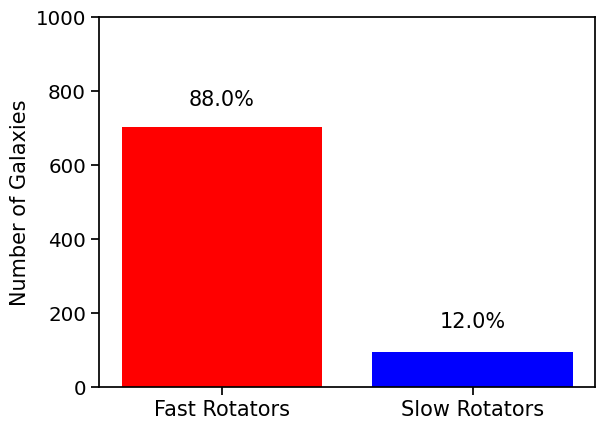

In [13]:
# histogram of fast and slow rotators
import matplotlib.pyplot as plt
df_has_fr_sr = df[df["SR_FR"] != -1]

plt.bar([0, 1], [len(df_has_fr_sr[df_has_fr_sr["SR_FR"] == 0]), len(df_has_fr_sr[df_has_fr_sr["SR_FR"] == 1])], color=['red', 'blue'],label=['Fast Rotators', 'Slow Rotators'])
plt.xticks([0, 1], ['Fast Rotators', 'Slow Rotators'],fontsize=15)
#plt.title('Sample of 797 Fast and Slow Rotators from SAMI Survey')
plt.ylabel('Number of Galaxies', fontsize=15)
plt.ylim(0, 1000)
# show ratio on plot
plt.text(0, 750, str(100*round(len(df_has_fr_sr[df_has_fr_sr["SR_FR"] == 0])/len(df_has_fr_sr), 2))+"%", ha='center', va='bottom',fontsize=15)
plt.text(1, 150, str(100*round(len(df_has_fr_sr[df_has_fr_sr["SR_FR"] == 1])/len(df_has_fr_sr), 2))+"%", ha='center', va='bottom',fontsize=15)

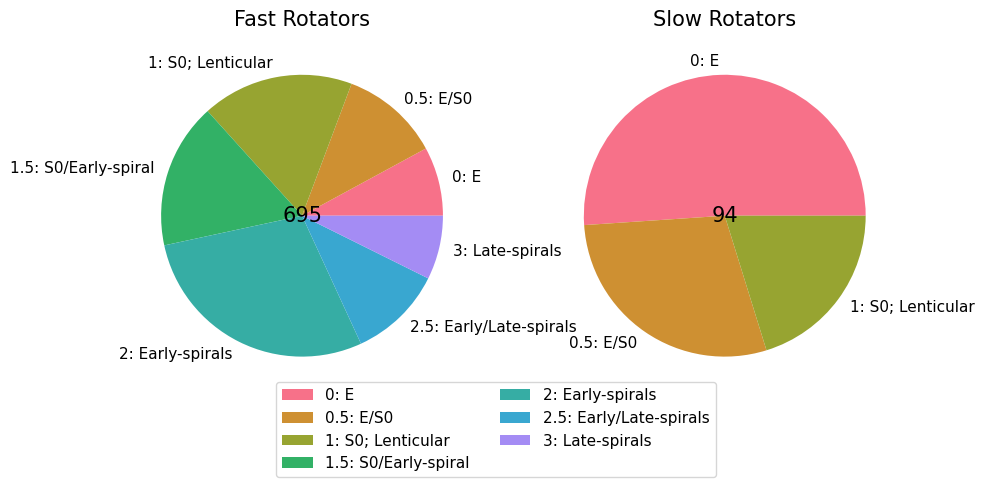

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 1x2 subplot figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

translation_dict = label_mapping
df_fr_only = df_has_fr_sr[df_has_fr_sr["SR_FR"] == 0]
df_tmp_fr = df_fr_only[["MTYPE"]]
df_tmp_fr = df_tmp_fr[df_tmp_fr != -9]
df_tmp_fr = df_tmp_fr[df_tmp_fr != 5]
df_tmp_fr.dropna(inplace=True)
df_tmp_fr['label'] = df_tmp_fr['MTYPE'].map(translation_dict)
colours = sns.color_palette("husl", 8)
df_sr_only = df_has_fr_sr[df_has_fr_sr["SR_FR"] == 1]
df_tmp_sr = df_sr_only[["MTYPE"]]
df_tmp_sr = df_tmp_sr[df_tmp_sr != -9]
df_tmp_sr = df_tmp_sr[df_tmp_sr != 5]
df_tmp_sr['label'] = df_tmp_sr['MTYPE'].map(translation_dict) 

# First Pie Chart (Fast Rotators)
ax = axs[0]
df
unique_mtypes_fr = df_tmp_fr["MTYPE"].value_counts().index
counts_fr = df_tmp_fr["MTYPE"].value_counts().values

sorted_mtypes_fr = sorted(unique_mtypes_fr)
sorted_counts_fr = [counts_fr[unique_mtypes_fr.tolist().index(mtype)] for mtype in sorted_mtypes_fr]

sorted_labels_fr = [translation_dict[mtype] for mtype in sorted_mtypes_fr]
# set xtick font to 12

ax.pie(sorted_counts_fr, labels=sorted_labels_fr, colors=colours, textprops={'fontsize': 11})
ax.set_title('Fast Rotators', loc='center', pad=10, fontsize=15)
ax.text(0, 0, str(len(df_tmp_fr["MTYPE"])), ha='center', va='center', fontsize=15)

# put legend on bottom
ax.legend(loc='upper center', bbox_to_anchor=(1.05, 0.05), ncol=2, fontsize=11)

# Second Pie Chart (Slow Rotators)
ax = axs[1]

unique_mtypes_sr = df_tmp_sr["MTYPE"].value_counts().index
counts_sr = df_tmp_sr["MTYPE"].value_counts().values

sorted_mtypes_sr = sorted(unique_mtypes_sr)
sorted_counts_sr = [counts_sr[unique_mtypes_sr.tolist().index(mtype)] for mtype in sorted_mtypes_sr]

sorted_labels_sr = [translation_dict[mtype] for mtype in sorted_mtypes_sr]

ax.pie(sorted_counts_sr, labels=sorted_labels_sr, colors=colours,textprops={'fontsize': 11})
ax.set_title('Slow Rotators', loc='center', pad=10, fontsize=15)
ax.text(0, 0, str(len(df_tmp_sr["MTYPE"])), ha='center', va='center',fontsize=15)


# Show the figure
plt.show()

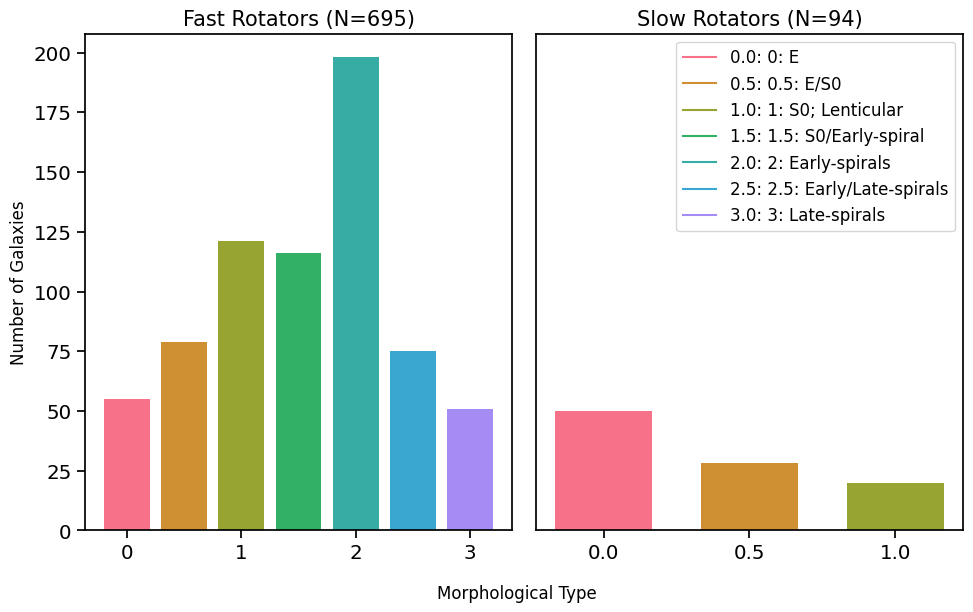

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique MTYPE values and their counts for fast rotators
unique_mtypes_fr = df_tmp_fr["MTYPE"].value_counts().index
counts_fr = df_tmp_fr["MTYPE"].value_counts().values

# Get unique MTYPE values and their counts for slow rotators
unique_mtypes_sr = df_tmp_sr["MTYPE"].value_counts().index
counts_sr = df_tmp_sr["MTYPE"].value_counts().values

# Sort MTYPE values alphabetically for both fast and slow rotators
sorted_mtypes_fr = sorted(unique_mtypes_fr)
sorted_mtypes_sr = sorted(unique_mtypes_sr)

# Map the sorted MTYPE values back to their labels for both fast and slow rotators
sorted_labels_fr = [str(mtype) + ": " + str(translation_dict[mtype]) for mtype in sorted_mtypes_fr]
sorted_labels_sr = [str(mtype) + ": " + str(translation_dict[mtype]) for mtype in sorted_mtypes_sr]

# Create a bar plot for fast rotators with specified bar width
bar_width = 0.4  # Adjust this width as needed
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # Create a subplot for fast rotators
plt.bar(sorted_mtypes_fr, [counts_fr[unique_mtypes_fr.tolist().index(mtype)] for mtype in sorted_mtypes_fr], width=bar_width, color=colours)
plt.title('Fast Rotators (N=695)', fontsize=15)
plt.ylabel('Number of Galaxies', fontsize=15*0.8)

# Create a bar plot for slow rotators with the same bar width
plt.subplot(1, 2, 2)  # Create a subplot for slow rotators
# change fig size of slow rotators
xticks = [0,0.1,0.2]
plt.bar(xticks, [counts_sr[unique_mtypes_sr.tolist().index(mtype)] for mtype in sorted_mtypes_sr], width=bar_width/6, color=colours)
plt.title('Slow Rotators (N=94)', fontsize=15)

# remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

plt.xticks(xticks, sorted_mtypes_sr)  # Rotate the xticks labels by 90 degrees
plt.ylim(0, 200)

# go through each colour and add label
for i in range(len(sorted_labels_fr)):
    # 0 length line
    plt.plot([], [], color=colours[i], label=sorted_labels_fr[i])

plt.legend(loc='upper right', fontsize=15*0.8)
    
plt.tight_layout()  # Ensures that the subplots do not overlap

plt.figtext( 0.45, -0.02,'Morphological Type', fontsize=15*0.8)

plt.show()